##Day 30 - DIY Solution

**Q1. Problem Statement: Chi-Square Test**

The “titanic.csv” dataset has details of passengers on board the Titanic when it met its fate in 1912. Your job is to compare how Passenger class affects the probability of survival with the help of the Chi-Square test. Load the “titanic.csv“ data into a DataFrame and perform the following tasks:
1.	Create a DataFrame with three columns from the original dataset –"PassengerID," "PClass," "Survived or not"
2.	Visualize the "PClass" and the "Survived or not" columns to get an overview of the columns
3.	Plot the correlation between passenger class and chances of survival and Calculating the survival rate for each class
4.	State Null hypothesis based on the class-wise survival rate
5.	Plot the difference between expected and observed correlations between passenger class and survival using heat maps to decide if there is a need for a Chi-Square Test
6.	Calculate Chi-Square and P – Values for each passenger class and the entire distribution
7.	Accept or reject the Null hypothesis based on the results obtained 


**Step-1:** Loading the dataset into a DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/titanic_dataset.csv", index_col='PassengerId', usecols=['PassengerId','Pclass','Survived'])
data

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
...,...,...
887,0,2
888,1,1
889,0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
dtypes: int64(2)
memory usage: 20.9 KB


**Step-2:** Visualizing the "PClass" column using Seaborn.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


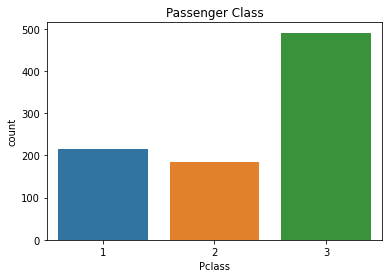

In [ ]:
sns.countplot(data.Pclass)
plt.title("Passenger Class")

plt.show()

**Step-2:** Visualizing the "Survived or not" column using Seaborn.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


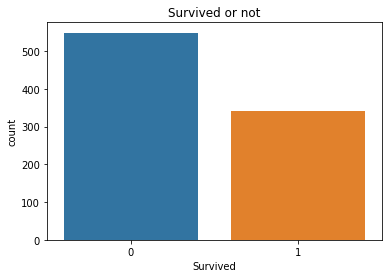

In [ ]:
sns.countplot(data.Survived)
plt.title("Survived or not")

plt.show()

**Step-3:** Creating a pivot table using "PClass" and "Survived or not" columns.

In [ ]:
PClass_survd = pd.pivot_table(data,index=['Pclass'],columns=['Survived'],aggfunc='size')
PClass_survd

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


**Step-4:** Plotting correlation between passenger class and chances of survival.

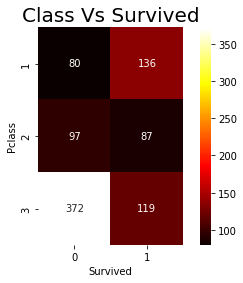

In [ ]:
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Class Vs Survived',fontsize=20)
plt.show()

**Observation:** 891 entries are present in the data. Most of the people in 3rd class died while most of the people in 1st class survived. In order to see whether there is a bias in the data, we can do the **Chi Square Test** with an assumption that there is no biase between the columns..

**Step-5:** Calculating the rate of survival for each class.

In [ ]:
pct_class = PClass_survd.sum(axis=1)/891
pct_class

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

In [ ]:
pct_survived = PClass_survd.sum(axis=0)/891
pct_survived

Survived
0    0.616162
1    0.383838
dtype: float64

**Step-6:** Stating the Null hypotheisis based on survival rates.

We can see that there is 24% of total passengers in Class 1, 20.65% of total passengers in Class 2 and remaining 55.11% in Class 3.

Also 61.62% of total passeneger survived.

If we have,

**Null hypothesis:** 'The Survival does not depend on the Class the passengers were travelling'.

In [ ]:
pct_class.to_frame()@(pct_survived.to_frame().T) 
# These are the proportion of people expected with null hypothesis

Survived,0,1
Pclass,,
1,0.149373,0.093052
2,0.127243,0.079266
3,0.339546,0.211520


In [ ]:
exp = round(pct_class.to_frame()@(pct_survived.to_frame().T)*891)
exp
# This is the number of people in all classes and survival history expected.

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


**Step-7:** Showing the the difference between expected and observed correlations between passenger class and survival using heat maps. 

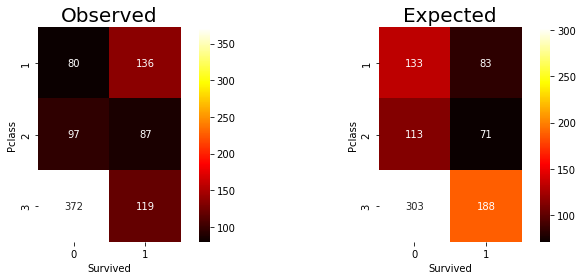

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot('121')
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

**Observation:** There is a visible difference between the expected and the observed distributions. So are they by chance or not? Lets now find the Chi value and P value.

**Step-8:** Tabulating chi square values for each class and the survival rate with degrees of freedom is 2x1.

In [ ]:
Chi_table = ((PClass_survd - exp)**2)/exp
Chi_table

Survived,0,1
Pclass,,
1,21.120301,33.843373
2,2.265487,3.605634
3,15.712871,25.324468


**Step-9:** Calculating the Chi square vale and p value of the distribution.

In [ ]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  101.87213414657131
P value is 5.9223796800860216e-24


**Step-7:** We can also conduct Chi square test from contigency table.

In [ ]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(PClass_survd)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  102.88898875696056
P value is 4.549251711298793e-23
Degrees of Freedom: 2


**Result:** Here we see that the P value is much less than zero and we can reject the null hypothesis.

There is a great dependence of survival on the passenger class.

Having made comparisons between two categorical columns. We can use this methodology for feature selection as well.